In [1]:
import chess
import torch
from torch import nn
import torch.nn.functional as F
import numpy as np
import random
import pandas as pd
import util

In [2]:
import importlib
importlib.reload(util)

<module 'util' from 'g:\\Dev\\ChessBot\\util.py'>

In [3]:
board = chess.Board()

In [4]:
from emulation_architectures.v1architecture import MainModel

In [5]:
data = pd.read_csv('games.csv')

In [6]:
net = MainModel(hidden_neuron_count=512, num_hidden_layers=6)
lossfn = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters())

In [25]:
move_tensor[:3]

tensor([0., 0., 0.])

In [8]:
util.onehot_tensor_to_uci(output), util.onehot_tensor_to_uci(move_tensor)

('c5a2', 'c0a2')

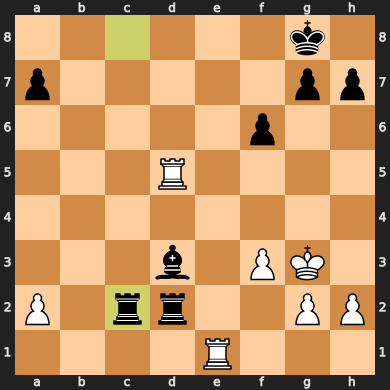

In [9]:
board

In [10]:
# index through data rows
for epoch in range(500):
    for index, row in data.iterrows():
        board = chess.Board()
        game = row['moves']
        white_elo = row['white_rating']
        black_elo = row['black_rating']

        if white_elo < 2500 and black_elo < 2500:
            continue

        white_elo /= 3000
        black_elo /= 3000

        moves = game.split()

        for move in game.split():
            if board.turn == chess.WHITE:
                concater = torch.tensor([white_elo, board.turn], dtype=torch.float32)
            else:
                concater = torch.tensor([black_elo, board.turn], dtype=torch.float32)

            flattened_board = util.one_hot_board(util.board_to_list(board))
            # flatten
            flattened_board = torch.flatten(flattened_board)

            uci = board.push_san(move).uci()
            move_tensor = util.uci_to_onehot_tensor(uci)
            
            input_vec = torch.concat([flattened_board, concater])
            # get the output
            output = net(input_vec)
            optimizer.zero_grad()
            loss = lossfn(output, move_tensor)
            loss.backward()
            optimizer.step()

            print(index, loss, '            ', end="\r")

r n b q k . n r
p p . . . . p p
. . p . p . . .
b . . . . . . .
. . . P . . . .
. . N . . N . .
P P . . P P P P
R . B Q K B . R
<LegalMoveGenerator at 0x1bca3285910 (Ng5, Ne5, Nh4, Nd2, Ng1, Rg1, Kd2, Qa4, Qd3, Qb3, Qd2, Qc2, Bh6, Bg5, Bf4, Be3, Bd2, Rb1, d5, h3, g3, e3, b3, a3, h4, g4, e4, b4, a4)>
---
r . b q k b n r
p p p p . . p p
. . . . . . . .
. . . . n . . .
. . P . P . . .
. . . . . . . .
P P . . . . P P
R N B . K B N R
<LegalMoveGenerator at 0x1bca1b7a090 (Ne7, Nh6, Nf6, Be7, Bd6, Bc5, Bb4+, Ba3, Kf7, Ke7, Qe7, Qf6, Qg5, Qh4+, Rb8, Nf7, Ng6, Nc6, Ng4, Nxc4, Nf3+, Nd3+, h6, g6, d6, c6, b6, a6, h5, g5, d5, c5, b5, a5)>
---
. . . . . . . .
. . . . . P . .
. . P . . . . R
. . . . p . . .
k . P . . . B .
. . Q . . . . .
. P . . . P P P
. . . . K . N R
<LegalMoveGenerator at 0x1bca1d27690 (Rh8, Rh7, Rg6, Rf6, Re6, Rd6, Rh5, Rh4, Rh3, Bc8, Bd7, Be6, Bh5, Bf5, Bh3, Bf3, Be2, Bd1#, Qxe5, Qa5+, Qd4, Qb4+, Qh3, Qg3, Qf3, Qe3, Qd3, Qb3+, Qa3#, Qd2, Qc2+, Qc1, Nh3, Nf3, Ne2, Ke2, Kd2, Kf1

KeyboardInterrupt: 

In [ ]:
net = MainModel()